# Word2Vec 소개

## 유사한 단어들을 비슷한 방향과 힘의 벡터를 갖도록 변환하여 사용하는 방법
- 1안) 자신의 문장으로 단어별 벡터를 생성한다.
- 2안) 미리 트레이닝된 모델의 벡터를 이용한다.
- 3안) 자신 단어별 벡터와 미리 트레이닝 모델의 벡터를 교차하여 이용한다.<br>
  (보유한 단어사전은 바뀌지 않고 벡터와 교차하여 업데이트된다.)

### 1안

In [1]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# 단어와 2차원 X축의 값, Y축의 값을 입력받아 2차원 그래프를 그림
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8, 6))
    plt.scatter(xs, ys, marker='o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

In [3]:
sentences = [
              ['this', 'is', 'a', 'good', 'product'],
              ['it', 'is', 'a', 'excellent', 'product'],
              ['it', 'is', 'a', 'bad', 'product'],
              ['that', 'is', 'the', 'worst', 'product']
            ]

In [4]:
# 문장을 이용하여 단어와 벡터를 생성
model = Word2Vec(sentences, size=300, window=3, min_count=1, workers=1)

In [5]:
# 단어 백터 구하기
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [9]:
vocabs

dict_keys(['this', 'is', 'a', 'good', 'product', 'it', 'excellent', 'bad', 'that', 'the', 'worst'])

In [6]:
word_vectors_list

[array([-7.80406757e-04,  5.65672759e-04, -6.68356486e-04, -1.62371376e-03,
         1.03028642e-03,  1.12969382e-03,  7.54044682e-04, -9.93519905e-04,
         1.21118652e-03,  1.32129283e-03,  3.76248718e-05, -1.15858286e-03,
        -2.91644275e-04,  1.54247135e-03, -5.69900963e-04, -2.58923683e-04,
        -1.32040808e-03,  2.12528437e-04, -3.12250195e-04, -1.11323490e-03,
         1.51761237e-03,  1.17038330e-03,  3.05643189e-04,  1.13116938e-03,
         1.89112325e-04,  1.02578127e-03,  1.54300639e-03, -4.53861394e-05,
         1.56952837e-03,  8.12985760e-04, -3.48370493e-04,  1.48272072e-03,
        -6.16199861e-04,  1.40983763e-03, -1.04075461e-03, -8.42732785e-04,
         1.83061002e-05, -1.17989061e-04,  6.64711464e-04, -1.38163078e-03,
         5.15526743e-04, -2.37765882e-04,  8.83156375e-04,  1.24746840e-03,
        -8.33475671e-04, -5.32827456e-04,  6.79184217e-04, -2.90065887e-04,
        -1.35426305e-03, -3.47294234e-04, -1.49812014e-03,  1.57824042e-03,
         1.6

In [7]:
# 단어간 유사도 확인
word_vectors.similarity(w1='it', w2='this')

-0.02409348

In [8]:
# 그래프 그리기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

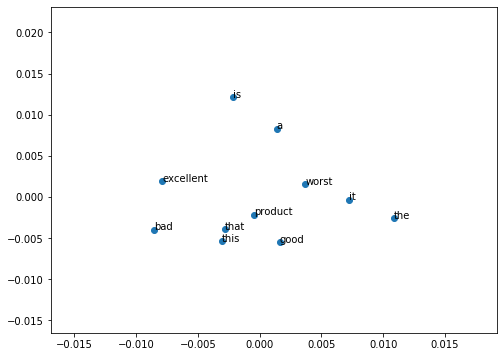

In [12]:
plot_2d_graph(vocabs, xs, ys)

### 3안) 미리 학습된 모델과 병합

In [14]:
# 다운로드(https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download)
filename = 'data/01_GoogleNews-vectors-negative300.bin'
model.intersect_word2vec_format(fname=filename, binary=True)

In [15]:
# 단어 벡터 구하기
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [17]:
len(word_vectors_list)

11

In [16]:
# 단어간 유사도 확인
word_vectors.similarity(w1='it', w2='this')

0.5386158

In [18]:
# 그래프 그리기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

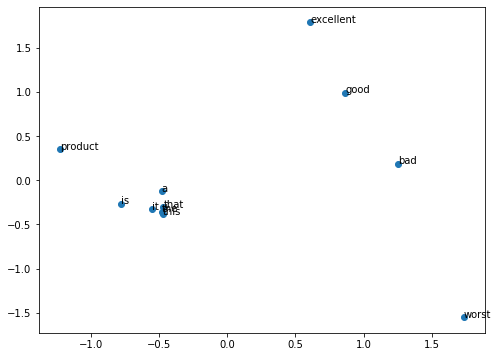

In [19]:
plot_2d_graph(vocabs, xs, ys)

#### 최종 모델 저장

In [21]:
model.save('model/01_word2vec.model')

#### 저장한 모델을 읽어서 사용

In [22]:
model = Word2Vec.load('model/01_word2vec.model')